In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


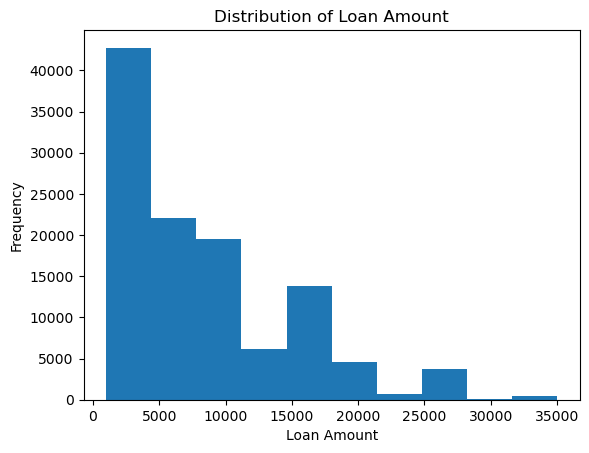

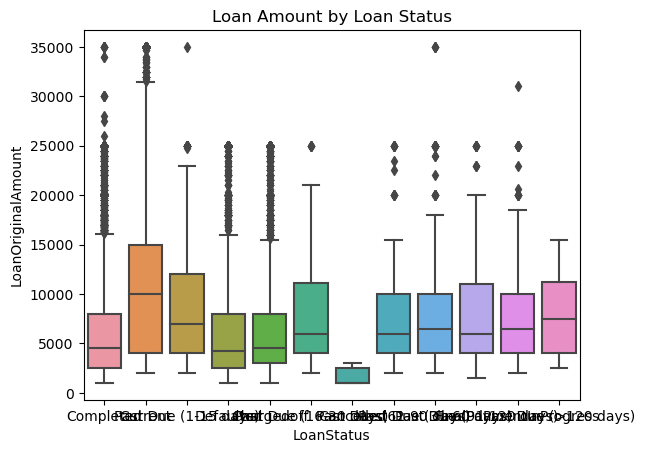

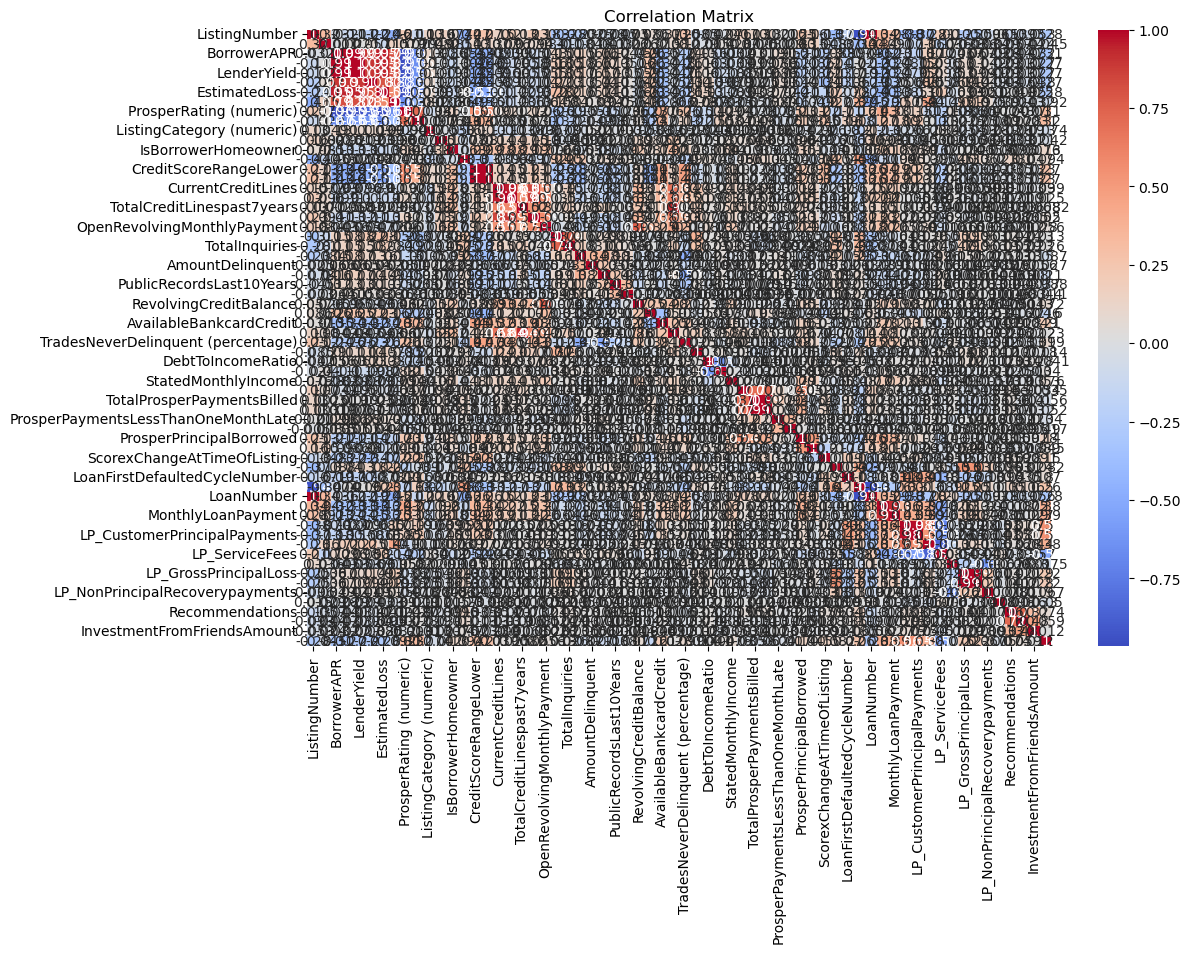

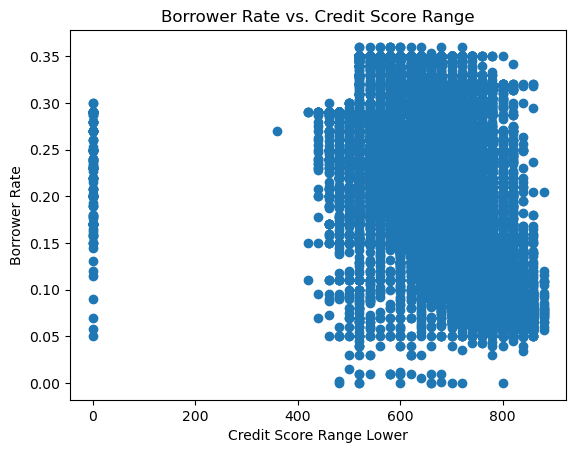

In [4]:
# Load the Prosper Loans dataset

df_loans = pd.read_csv("prosperLoanData.csv")

# Basic Data Exploration
# Check the first five rows of the dataset

df_loans.head()

# Check the shape of the dataset
df_loans.shape

# Check the data types of the columns

df_loans.dtypes

# Check the summary statistics of the numerical columns

df_loans.describe()

# Check the unique values of categorical columns

df_loans.select_dtypes(include=['object']).nunique()

# Check for missing values
df_loans.isnull().sum()

# Data Visualization
# Histogram of loan amount

plt.hist(df_loans['LoanOriginalAmount'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of loan amount by loan status

sns.boxplot(x='LoanStatus', y='LoanOriginalAmount', data=df_loans)
plt.title('Loan Amount by Loan Status')
plt.show()

# Heatmap of correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df_loans.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatterplot of borrower rate vs. credit score range

plt.scatter(x='CreditScoreRangeLower', y='BorrowerRate', data=df_loans)
plt.title('Borrower Rate vs. Credit Score Range')
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Borrower Rate')
plt.show()

**2**

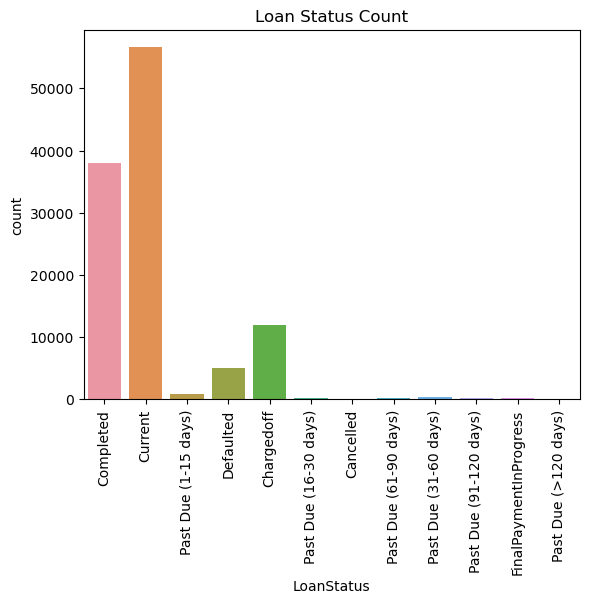

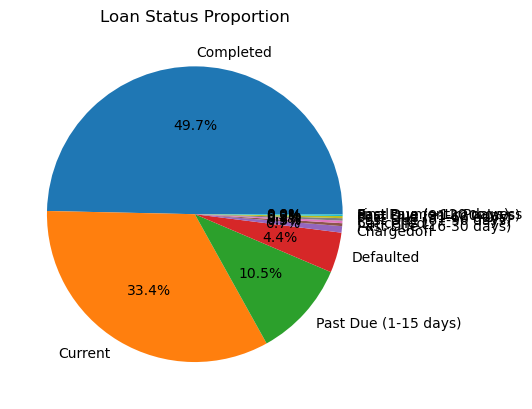

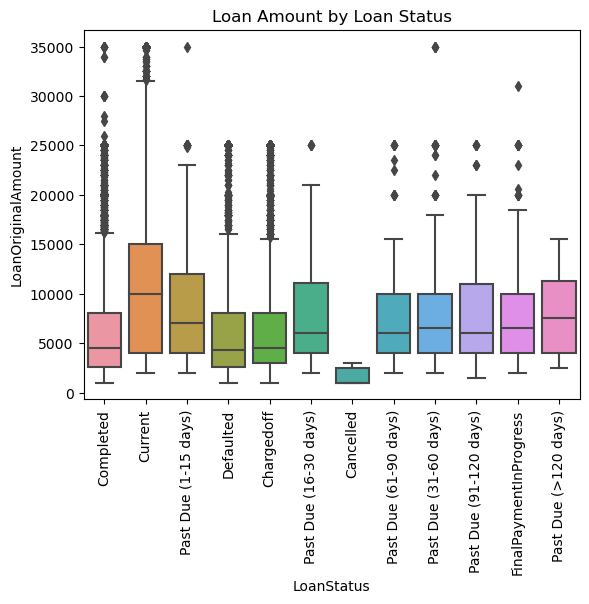

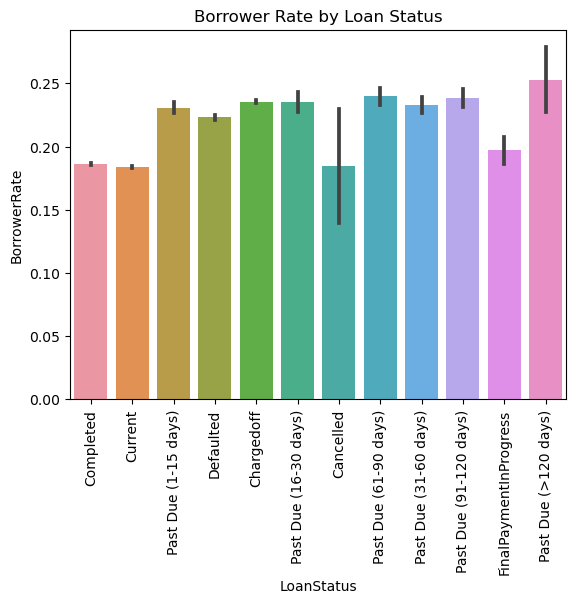

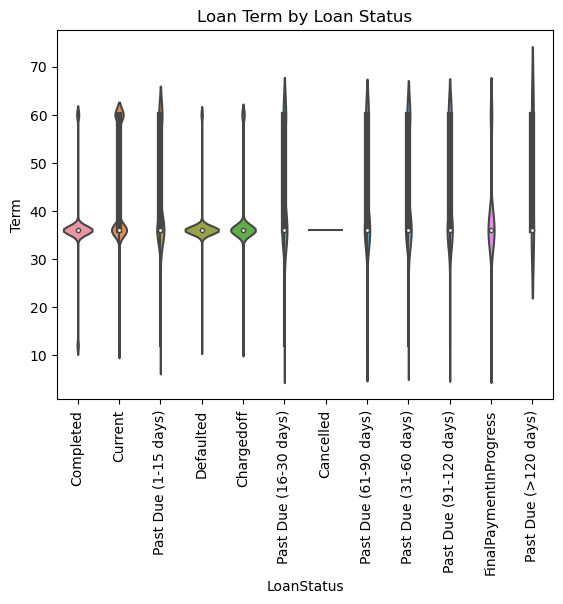

In [6]:
# Load the Prosper Loans dataset

df_loans = pd.read_csv("prosperLoanData.csv")

# Basic Data Exploration
# Check the summary statistics of the 'LoanStatus' column

df_loans['LoanStatus'].describe()

# Check the frequency distribution of 'LoanStatus' column

df_loans['LoanStatus'].value_counts()

# Data Visualization
# Barplot of loan status count

sns.countplot(x='LoanStatus', data=df_loans)
plt.title('Loan Status Count')
plt.xticks(rotation=90)
plt.show()

# Pie chart of loan status count

plt.pie(df_loans['LoanStatus'].value_counts(), labels=df_loans['LoanStatus'].unique(), autopct='%1.1f%%')
plt.title('Loan Status Proportion')
plt.show()

# Boxplot of loan original amount by loan status

sns.boxplot(x='LoanStatus', y='LoanOriginalAmount', data=df_loans)
plt.title('Loan Amount by Loan Status')
plt.xticks(rotation=90)
plt.show()

# Barplot of borrower rate by loan status

sns.barplot(x='LoanStatus', y='BorrowerRate', data=df_loans)
plt.title('Borrower Rate by Loan Status')
plt.xticks(rotation=90)
plt.show()

# Violinplot of loan term by loan status

sns.violinplot(x='LoanStatus', y='Term', data=df_loans)
plt.title('Loan Term by Loan Status')
plt.xticks(rotation=90)
plt.show()

**3**

In [7]:
# Load the Prosper Loans dataset
#df_loans = pd.read_csv('ProsperLoanData.csv')

# Data Preparation
# Create a new column for loan status category

df_loans['LoanStatusCategory'] = np.where(df_loans['LoanStatus'].isin(['Completed', 'FinalPaymentInProgress']), 'Paid Off', 'Defaulted or Current')

# Drop irrelevant columns
df_loans = df_loans.drop(columns=['ListingKey', 'ListingNumber', 'LoanKey', 'LoanNumber', 'LoanStatus'])

# Data Cleaning
# Drop rows with missing values

df_loans = df_loans.dropna()

# Remove outliers from the 'BorrowerRate' and 'LoanOriginalAmount' columns
df_loans = df_loans[df_loans['BorrowerRate'] <= 0.5]
df_loans = df_loans[df_loans['LoanOriginalAmount'] <= 35000]

# Data Encoding
# Convert categorical variables to numerical using one-hot encoding

df_loans = pd.get_dummies(df_loans, columns=['EmploymentStatus', 'LoanStatusCategory'])

# Convert the Prosper Rating (Alpha) column to a numerical scale

df_loans['ProsperRating (numeric)'] = df_loans['ProsperRating (Alpha)'].map({'HR': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6, 'AA': 7})

# Drop the original Prosper Rating (Alpha) column

df_loans = df_loans.drop(columns=['ProsperRating (Alpha)'])